# Panda Basics
## open a CSV and show some rows
for all the parameters to read csv files please read:
please read https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [92]:
import pandas as pd
df = pd.read_csv("./sample/FL_insurance_sample.csv", sep = '\t')

df.head()

,policyID,statecode,county,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,30102261,-81711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,30063936,-81707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,30089579,-81700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,30063236,-81707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,30060614,-81702675,Residential,Wood,1


## Iterate row by row through the data set

In [20]:
for id, row in df.iterrows():
    if id > 10:
        print("Unique Row ID: " + str(id))
        print(row)
    if id >= 11:
        break

Unique Row ID: 11
policyID                  894922
statecode                     FL
county               CLAY COUNTY
point_latitude          30095957
point_longitude        -81695099
line                 Residential
construction                Wood
point_granularity              1
Name: 11, dtype: object


## Get just one column as array

In [37]:
construnction = df["construction"]
print(type(construnction))
index = 0
for entry in construnction:
    if index > 10:
        print(entry)
    if index >= 15:
        break
    index+=1

<class 'pandas.core.series.Series'>
Wood
Wood
Wood
Wood
Wood


## Get just some rows as dictonary

In [49]:
# get the sixth row
my_row = df.iloc[6]
print(type(my_row))
print('------------')
print(my_row['statecode'])
print('------------')
print(my_row)

<class 'pandas.core.series.Series'>
------------
FL
------------
policyID                          995932
statecode                             FL
county                       CLAY COUNTY
point_latitude                  30102226
point_longitude                -81713882
line                          Commercial
construction         Reinforced Concrete
point_granularity                      1
Name: 6, dtype: object


In [41]:
# get the last three rows
print(df.iloc[-3:])

       policyID statecode           county  point_latitude  point_longitude  \
36631    791209        FL  PINELLAS COUNTY         2811055         -8276636   
36632    322627        FL  PINELLAS COUNTY        28089415        -82697411   
36633    398149        FL  PINELLAS COUNTY         2806444         -8277459   

              line construction  point_granularity  
36631  Residential         Wood                  4  
36632  Residential      Masonry                  3  
36633  Residential      Masonry                  1  


In [40]:
#get the third to the sixth row
print(df.iloc[3:6])

   policyID statecode       county  point_latitude  point_longitude  \
3    333743        FL  CLAY COUNTY        30063236        -81707703   
4    172534        FL  CLAY COUNTY        30060614        -81702675   
5    785275        FL  CLAY COUNTY        30063236        -81707703   

          line construction  point_granularity  
3  Residential         Wood                  3  
4  Residential         Wood                  1  
5  Residential      Masonry                  3  


## Sort records
there are some parameters which can be used to do klever sortings: 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [89]:
df.iloc[:10].sort_values('policyID', ascending = False)

,policyID,statecode,county,point_latitude,point_longitude,line,construction,point_granularity
6,995932,FL,CLAY COUNTY,30102226,-81713882,Commercial,Reinforced Concrete,1
5,785275,FL,CLAY COUNTY,30063236,-81707703,Residential,Masonry,3
1,448094,FL,CLAY COUNTY,30063936,-81707664,Residential,Masonry,3
8,433512,FL,CLAY COUNTY,30118774,-81704613,Residential,Wood,1
3,333743,FL,CLAY COUNTY,30063236,-81707703,Residential,Wood,3
7,223488,FL,CLAY COUNTY,30102217,-81707146,Residential,Wood,1
2,206893,FL,CLAY COUNTY,30089579,-81700455,Residential,Wood,1
4,172534,FL,CLAY COUNTY,30060614,-81702675,Residential,Wood,1
9,142071,FL,CLAY COUNTY,30100628,-81703751,Residential,Masonry,1
0,119736,FL,CLAY COUNTY,30102261,-81711777,Residential,Masonry,1


## Filter dedicated records
if you have one column with your filter criteris (e.g. the matherial of construction) you can filter all records by this column (e.g. all records which are not out of wood) 

In [97]:
non_wood = df[df['county'] == 'CLAY COUNTY']
non_wood = non_wood[non_wood['construction'] != 'Wood']
non_wood = non_wood[non_wood['policyID'] < 119736]
non_wood

,policyID,statecode,county,point_latitude,point_longitude,line,construction,point_granularity
830,110888,FL,CLAY COUNTY,30100992,-81955376,Residential,Masonry,1
849,110872,FL,CLAY COUNTY,3018584,-8171522,Residential,Masonry,1


## Plot results
we plot for all geolocations in Florida (just the continent) one point 

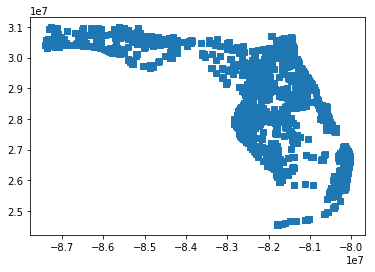

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

subset = df[df['statecode'] == 'FL']
subset = subset[subset['point_longitude'] < -0.6e8 ]
subset = subset[subset['point_latitude'] > 2.0e7]

longitudes = subset['point_longitude']
latitudes = subset['point_latitude']

plt.plot(longitudes, latitudes, 's')
plt.show()